# Data Analysis

We have six datasets: 
1. Participant data
2. Participant task interaction data
3. Personality test of participants
4. Tasks
5. Post Study questionnaire data
6. Messages data

In [1]:
# Imports
import pandas as pd

## Pulling the data from Supabase

In [91]:
import csv
import requests

SUPABASE_URL = "https://vhuxlodxugpwodorwwzq.supabase.co"
SUPABASE_KEY = "sb_secret_iRWiJzUEwwbHNFA3A5LIUg_w_b9pmrh"

def export_table_to_csv(table_name: str, filename):
    """
    Export any Supabase table to a CSV file.
    
    Args:
        table_name (str): Name of the table to export.
        filename (str): Output CSV filename (defaults to <table_name>.csv).
    """
    if filename is None:
        filename = f"{table_name}.csv"

    url = f"{SUPABASE_URL}/rest/v1/{table_name}"
    headers = {
        "apikey": SUPABASE_KEY,
        "Authorization": f"Bearer {SUPABASE_KEY}",
        "Accept": "application/json"
    }

    # Fetch all rows
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        raise Exception(f"Error fetching {table_name}: {response.status_code} {response.text}")
    
    rows = response.json()
    if not rows:
        print(f"No data found in {table_name}.")
        return

    # Write to CSV
    keys = rows[0].keys()
    with open(filename, mode="w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        writer.writerows(rows)

    print(f"Exported {len(rows)} rows from '{table_name}' to {filename}")

# Example usage
# export_table_to_csv("participant", 'participant.csv')      # saves to participant.csv
# export_table_to_csv("task", "tasks.csv") # saves to tasks.csv
# export_table_to_csv("participant_task_interaction", "participant_task_interaction.csv")
# export_table_to_csv("message", "message.csv")
# export_table_to_csv("personality_test", "personality_test.csv")
# export_table_to_csv("post_study_questions", "post_study_questions.csv")

## Participants Data Cleaning

In [4]:
participant = pd.read_csv('participant.csv')
participant = participant.drop(columns=['password'], axis=1)
participant.tail()


,id,created_at,name,email,age,gender,education,occupation,nationality,frequency_usage,english_fluency,ai_usage,consent,familiarity
85,82,2025-08-26T15:55:48.308759+00:00,Mehrunisa Usman,Musmann.141@gmail.com,28,female,university,management,pakistan,always,intermediate-b2,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,{}
86,85,2025-08-26T15:55:48.684252+00:00,Mehrunisa Usman,Musmann.141@gmail.com,28,female,university,management,pakistan,always,intermediate-b2,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,{}
87,88,2025-08-26T15:59:02.322283+00:00,Hafsa Usman,hafsausman260@gmail.com,25,female,post-secondary,none,pakistan,occasionally,fluent-c2,"[{'label': 'Research / Information Gathering',...",True,"{'1': True, '2': True, '3': False, '4': True, ..."
88,89,2025-08-26T16:32:21.172985+00:00,Mehrunisa Usman,musmann.141@gmail.com,28,female,university,management,pakistan,multiple-times,intermediate-b1,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,{}
89,90,2025-08-26T23:03:32.069968+00:00,Zainab Mushtaq,zainabniaz12@gmail.com,24,female,university,management,pakistan,rarely,fluent-c2,"[{'label': 'Learning / Studying', 'value': 'le...",True,"{'1': True, '2': True, '3': True, '4': True, '..."


In [5]:
print("total females:", participant.loc[participant['gender'] == 'female'].reset_index(drop=True).__len__())
print("total males:", participant.loc[participant['gender'] == 'male'].reset_index(drop=True).__len__())
print('Both includes duplicates')

total females: 42
total males: 48
Both includes duplicates


In [6]:
participant['gender'].unique()

array(['female', 'male'], dtype=object)

### Handling deduplication

In [7]:
participant['email'] = participant['email'].str.lower().str.strip()
participant['name'] = participant['name'].str.lower().str.strip()

print(participant["name"].value_counts()[participant["name"].value_counts() > 1].__len__())
print(participant["email"].value_counts()[participant["email"].value_counts() > 1].__len__())

12
13


As some participants attempted the study more than once, we will still consider their prompts so we will merge them after we have imported and cleaned all the other datasets.

## Participant Task Interaction

In [8]:
participant_task_interaction = pd.read_csv('participant_task_interaction.csv')
participant_task_interaction.head()


,id,started_at,ended_at,ai_tool,participant_id,task_id
0,1,2025-08-11T16:43:46.321746+00:00,2025-08-11T16:43:46.588334+00:00,GPT-4o,1,1
1,2,2025-08-11T16:47:04.536261+00:00,NaN,GPT-4o,1,2
2,4,2025-08-11T16:48:39.841189+00:00,NaN,GPT-4o,1,3
3,5,2025-08-11T16:49:07.215491+00:00,NaN,GPT-4o,1,3
4,3,2025-08-11T16:48:15.553518+00:00,2025-08-11T16:49:21.11072+00:00,GPT-4o,1,3


## Messages

In [9]:
message = pd.read_csv('message.csv')
message.tail()

,id,created_at,interaction_id,sender,content
995,991,2025-08-26T16:09:36.07+00:00,496,user,add more plants and make it more victorian
996,992,2025-08-26T16:09:52.876+00:00,496,ai,/static/images/image_20250826_161017_474168_5a...
997,993,2025-08-26T16:10:28.467+00:00,497,user,"this is too much greenery, remove the greenery..."
998,994,2025-08-26T16:10:45.706+00:00,497,ai,/static/images/image_20250826_161111_624337_88...
999,995,2025-08-26T16:12:06.952+00:00,498,user,I have 4 apartment members and I need a plan t...


In [10]:
task = pd.read_csv('tasks.csv')
task

,id,description,task_type,category,title
0,1,Describe one of your favorite moments from you...,image,Image Generation,Visualize a memory from your last vacation.
1,2,You recently moved into a new room and are see...,image,Image Generation,Design your room
2,3,Start by telling the AI about your roommates (...,text,Brainstorming,You share an apartment and want help dividing ...
3,4,"Describe your friend to the AI — personality, ...",text,Brainstorming,Buy a thoughtful birthday gift for your best f...
4,5,"Share your fitness goals, dietary preferences,...",text,Planning,Build a weekly fitness and meal plan tailored ...
5,6,Start by telling the AI what a typical day in ...,text,Planning,You want to become more productive in your dai...
6,9,"First, ask the AI to explain it simply. Then a...",text,Knowledge / Research,Teach a 5-year-old how photosynthesis works
7,10,Have a conversation with the AI to explore:\n ...,text,Knowledge / Research,Learn more about feminism and form an opinion
8,11,"Start with a basic idea (e.g., a shy dragon wh...",text,Storywriting (Creative),Write a fictional short story with AI assistance
9,12,Tell the AI what kind of person you are and wh...,text,Open-Ended / Expressive,Create your dating profile bio using AI


## Handling Duplication

Merging across the datasets.

In [11]:
import numpy as np

# Step 1: normalize email
participant["email_norm"] = participant["email"].str.strip().str.lower()

# Step 2: build dedupe key
participant["dedupe_key"] = np.where(
    participant["email_norm"].notna(),
    participant["email_norm"],
    participant["name"].str.strip().str.lower() + "_" +
    participant["age"].astype(str) + "_" +
    participant["nationality"].str.strip().str.lower()
)

# Step 3: sort and pick a canonical row for each dedupe_key
participants_sorted = participant.sort_values("created_at")
canonical = participants_sorted.drop_duplicates(subset=["dedupe_key"], keep="first")

# Step 4: map ALL old_ids to the canonical_id
id_map = {}
for key, group in participants_sorted.groupby("dedupe_key"):
    canonical_id = group.iloc[0]["id"]   # pick the first submission
    for pid in group["id"]:
        id_map[pid] = canonical_id

# Step 5: reassign interactions to canonical participant_id
participant_task_interaction["participant_id"] = participant_task_interaction["participant_id"].map(id_map)

# Step 6: now canonical is your deduplicated participant table
deduped = canonical.copy()

# Step 7: balance genders
male_df = deduped[deduped["gender"].str.lower() == "male"]
female_df = deduped[deduped["gender"].str.lower() == "female"]

n_females = len(female_df)
balanced_male_df = male_df.sample(n=n_females, random_state=42)

final_participants = pd.concat([balanced_male_df, female_df], ignore_index=True)
final_participants = final_participants.sample(frac=1, random_state=42).reset_index(drop=True)

print(final_participants["gender"].value_counts())


gender
male      14
female    14
Name: count, dtype: int64


In [12]:
male_df.__len__()



35

In [61]:
final_participants.groupby('gender').count()

,id,created_at,name,email,age,education,occupation,nationality,frequency_usage,english_fluency,ai_usage,consent,familiarity,email_norm,dedupe_key
gender,,,,,,,,,,,,,,,
female,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
male,14,14,14,14,14,14,14,14,13,14,14,14,14,14,14


# Analysis

Data restructuring with all data frames in a single dataframe.

In [13]:
# Merge PTI with message
merged_df = participant_task_interaction.merge(
    message,
    left_on="id",          
    right_on="interaction_id",  
    how="inner"
)

# Merge with task
merged_df = merged_df.merge(
    task,
    left_on="task_id",
    right_on="id",
    how="inner",
    suffixes=("", "_task")
)

# Merge with participant (to bring gender + any other attributes)
merged_df = merged_df.merge(
    final_participants,
    left_on="participant_id",
    right_on="id",
    how="inner",
    suffixes=("", "_participant")
)

# Sort for chronological conversations
merged_df = merged_df.sort_values(by=["participant_id", "task_id", "created_at"])

# Group conversations per participant/task, but now gender is also available
grouped_conversations = (
    merged_df.groupby(["participant_id", "gender", "task_id"])
    .apply(lambda x: [
        {"sender": row["sender"], "content": row["content"], "created_at": row["created_at"]}
        for _, row in x.iterrows()
    ])
    .reset_index(name="conversation")
)



C:\Users\Aliza\AppData\Local\Temp\ipykernel_18244\1365536167.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: [


In [15]:
grouped_conversations.tail()

,participant_id,gender,task_id,conversation
91,65,female,11,"[{'sender': 'user', 'content': 'Write a fictio..."
92,65,female,12,"[{'sender': 'user', 'content': 'i am fat and i..."
93,88,female,1,"[{'sender': 'user', 'content': 'Make me an ima..."
94,88,female,2,"[{'sender': 'user', 'content': 'Its a cozy roo..."
95,88,female,3,"[{'sender': 'user', 'content': 'I have 4 apart..."


### N by gender

In [17]:
print('The number of total prompts by gender:')
merged_df.groupby('gender').count()['content']

The number of total prompts by gender:


gender
female    132
male      336
Name: content, dtype: int64

# Dependent Variables

## Prompt Length

In [18]:
def prompt_length(conv):
    return [len(msg["content"].split()) for msg in conv if msg["sender"] == "user"][0]


In [19]:
grouped_conversations["prompt_length"] = grouped_conversations["conversation"].apply(prompt_length)
prompt_lengths = grouped_conversations[['gender', 'prompt_length']]

In [20]:
prompt_lengths.head()

,gender,prompt_length
0,female,21
1,female,35
2,female,9
3,female,15
4,female,7


In [21]:
prompt_lengths.groupby('gender').mean()

,prompt_length
gender,
female,37.470588
male,29.919355


## Vocabular Variety (TTR)

In [22]:
def ttr(conv):
    '''Distinct Words Ratio'''
    texts = [msg["content"] for msg in conv if msg["sender"] == "user"]
    words = " ".join(texts).split()
    return len(set(words)) / len(words) if words else 0


In [23]:
grouped_conversations["ttr"] = grouped_conversations["conversation"].apply(ttr)
ttr = grouped_conversations[['gender', 'ttr']]

In [24]:
ttr.head()

,gender,ttr
0,female,0.904762
1,female,0.914286
2,female,0.833333
3,female,1.000000
4,female,0.935484


In [25]:
ttr.groupby('gender').mean()

,ttr
gender,
female,0.790567
male,0.795662


## Emotion and Judgement Words

In [26]:

# Load NRC Emotion Lexicon
lexicon = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", 
                      names=["word", "emotion", "association"], 
                      sep="\t")

# Keep only associations where association == 1
lexicon = lexicon[lexicon["association"] == 1]

# Convert to dictionary: {word: [emotions]}
emotion_words = {}
for _, row in lexicon.iterrows():
    emotion_words.setdefault(row["word"], []).append(row["emotion"])

print(emotion_words)

def emotion_counts(conv):
    counts = {
        "anger": 0, "anticipation": 0, "disgust": 0, "fear": 0,
        "joy": 0, "negative": 0, "positive": 0, "sadness": 0,
        "surprise": 0, "trust": 0
    }
    for msg in conv:
        if msg["sender"] == "user":   # or "participant" depending on your mapping
            for w in msg["content"].lower().split():
                if w in emotion_words:
                    for emo in emotion_words[w]:
                        counts[emo] += 1
    return counts



{'abacus': ['trust'], 'abandon': ['fear', 'negative', 'sadness'], 'abandoned': ['anger', 'fear', 'negative', 'sadness'], 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'], 'abba': ['positive'], 'abbot': ['trust'], 'abduction': ['fear', 'negative', 'sadness', 'surprise'], 'aberrant': ['negative'], 'aberration': ['disgust', 'negative'], 'abhor': ['anger', 'disgust', 'fear', 'negative'], 'abhorrent': ['anger', 'disgust', 'fear', 'negative'], 'ability': ['positive'], 'abject': ['disgust', 'negative'], 'abnormal': ['disgust', 'negative'], 'abolish': ['anger', 'negative'], 'abolition': ['negative'], 'abominable': ['disgust', 'fear', 'negative'], 'abomination': ['anger', 'disgust', 'fear', 'negative'], 'abort': ['negative'], 'abortion': ['disgust', 'fear', 'negative', 'sadness'], 'abortive': ['negative', 'sadness'], 'abovementioned': ['positive'], 'abrasion': ['negative'], 'abrogate': ['negative'], 'abrupt': ['surprise'], 'abscess': ['negative', 'sadness'], 'absence': ['fear

In [27]:
grouped_conversations["emotion_counts"] = grouped_conversations["conversation"].apply(emotion_counts)
emotion_counts = grouped_conversations[['gender', 'emotion_counts']]

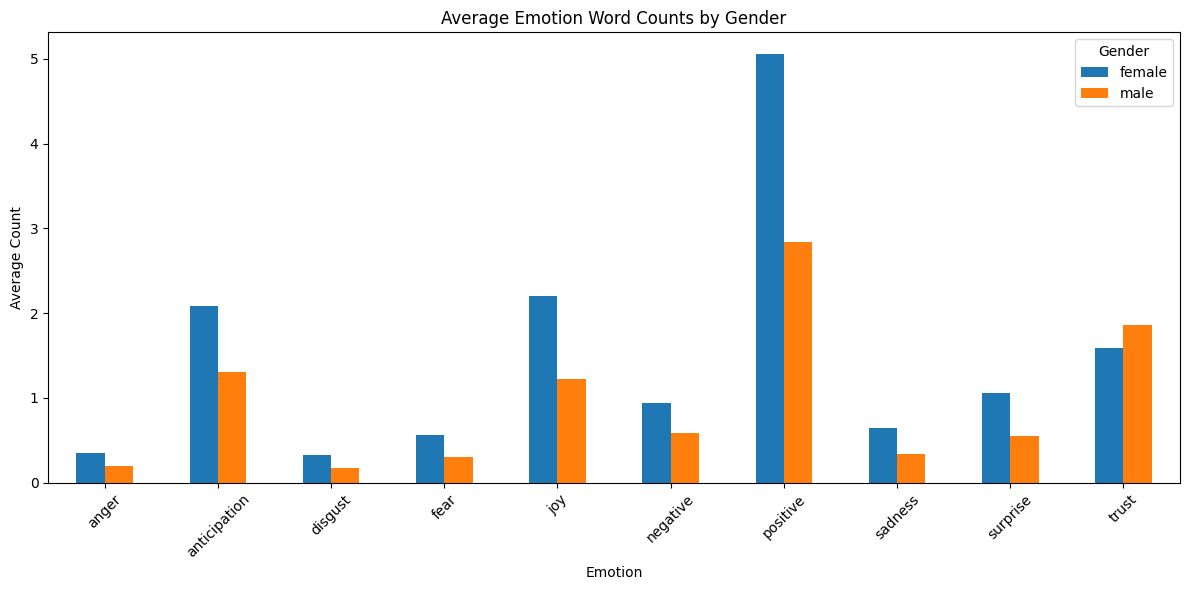

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

emotions_df = pd.json_normalize(emotion_counts['emotion_counts'])

# Merge with gender
df_expanded = pd.concat([emotion_counts['gender'], emotions_df], axis=1)

# Compute mean emotion counts by gender
mean_emotions = df_expanded.groupby("gender").mean()

# Plot
mean_emotions.T.plot(kind="bar", figsize=(12,6))
plt.title("Average Emotion Word Counts by Gender")
plt.ylabel("Average Count")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

## Pronoun Usage

In [29]:
pronouns = {
    "first": {"i","me","my","we","us","our"},
    "second": {"you","your","yours"},
    "third": {"he","she","they","it","them","his","her","their"}
}

def pronoun_usage(conv):
    counts = {"first": 0, "second": 0, "third": 0}
    total = 0
    for msg in conv:
        if msg["sender"] == "user":
            words = msg["content"].lower().split()
            total += len(words)
            for w in words:
                for p in pronouns:
                    if w in pronouns[p]:
                        counts[p] += 1
    return {k: v/total if total else 0 for k,v in counts.items()}


In [30]:
grouped_conversations["pronoun_usage"] = grouped_conversations["conversation"].apply(pronoun_usage)
pronoun_usage = grouped_conversations[['gender', 'pronoun_usage']]

In [31]:
pronoun_usage.head()

,gender,pronoun_usage
0,female,"{'first': 0.0, 'second': 0.0, 'third': 0.04761..."
1,female,"{'first': 0.0, 'second': 0.0, 'third': 0.0}"
2,female,"{'first': 0.16666666666666666, 'second': 0.0, ..."
3,female,"{'first': 0.13333333333333333, 'second': 0.0, ..."
4,female,"{'first': 0.0967741935483871, 'second': 0.0, '..."


In [32]:
# expand the dicts in pronoun_usage into columns
expanded = pd.json_normalize(pronoun_usage['pronoun_usage'])

# join gender with expanded values
df_expanded = pd.concat([pronoun_usage['gender'], expanded], axis=1)

df_expanded.groupby('gender')[['first', 'second', 'third']].mean()

,first,second,third
gender,,,
female,0.076257,0.002863,0.026075
male,0.052926,0.005735,0.020633


## Sentence Length

In [33]:
import nltk
# Only need to do this once; run separately, not inside main loop
nltk.download("punkt")
nltk.download("punkt_tab")  # sometimes required in new nltk versions

def avg_sentence_length(conv):
    lengths = []
    for msg in conv:
        if msg["sender"] == "user":
            sentences = nltk.sent_tokenize(msg["content"])
            for s in sentences:
                lengths.append(len(s.split()))
    return sum(lengths)/len(lengths) if lengths else 0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aliza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aliza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [34]:
grouped_conversations["sentence_length"] = grouped_conversations["conversation"].apply(avg_sentence_length)
sentence_length = grouped_conversations[['gender', 'sentence_length']]

In [35]:
sentence_length.head()

,gender,sentence_length
0,female,21.000000
1,female,7.000000
2,female,8.000000
3,female,7.500000
4,female,4.428571


In [36]:
sentence_length.groupby("gender").mean().reset_index()

,gender,sentence_length
0,female,10.745462
1,male,14.725654


## Sentence Count

In [37]:
def sentence_count(conv):
    return sum(len(nltk.sent_tokenize(msg["content"])) for msg in conv if msg["sender"]=="user")


In [38]:
grouped_conversations["sentence_count"] = grouped_conversations["conversation"].apply(sentence_count)
sentence_counts = grouped_conversations[['gender', 'sentence_count']]
sentence_counts.head()

,gender,sentence_count
0,female,1
1,female,5
2,female,3
3,female,2
4,female,7


In [39]:
sentence_counts.groupby("gender").mean().reset_index()

,gender,sentence_count
0,female,6.000000
1,male,3.951613


## Phatic Expressions

In [41]:
phatic = {"hi","hello","thanks","thank you","bye"}

def contains_phatic(conv):
    return any(any(word in msg["content"].lower() for word in phatic) 
               for msg in conv if msg["sender"]=="user")


In [42]:
grouped_conversations["phatic_expressions"] = grouped_conversations["conversation"].apply(contains_phatic)
phatic_expressions = grouped_conversations[['gender', 'phatic_expressions']]
phatic_expressions.head()

,gender,phatic_expressions
0,female,True
1,female,True
2,female,True
3,female,False
4,female,True


In [43]:
phatic_expressions.groupby("gender").mean().reset_index()

,gender,phatic_expressions
0,female,0.529412
1,male,0.451613


## Opinions (Subjectivity)

In [44]:
from textblob import TextBlob

def opinion_score(conv):
    texts = " ".join(msg["content"] for msg in conv if msg["sender"]=="user")
    return TextBlob(texts).sentiment.subjectivity if texts else 0


In [45]:
grouped_conversations["opinion_score"] = grouped_conversations["conversation"].apply(opinion_score)
opinion_scores = grouped_conversations[['gender', 'opinion_score']]
opinion_scores.head()

,gender,opinion_score
0,female,0.390000
1,female,0.241667
2,female,0.687500
3,female,1.000000
4,female,0.525983


In [46]:
opinion_scores.groupby("gender").mean().reset_index()

,gender,opinion_score
0,female,0.406108
1,male,0.389933


## Sentiment Score

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment(conv):
    texts = " ".join(msg["content"] for msg in conv if msg["sender"]=="user")
    return analyzer.polarity_scores(texts)["compound"] if texts else 0


In [48]:
grouped_conversations["sentiment"] = grouped_conversations["conversation"].apply(sentiment)
sentiment_scores = grouped_conversations[['gender', 'sentiment']]
sentiment_scores.head()

,gender,sentiment
0,female,-0.3384
1,female,0.3612
2,female,0.0772
3,female,0.8225
4,female,0.6397


In [49]:
sentiment_scores.groupby("gender").mean().reset_index()

,gender,sentiment
0,female,0.541059
1,male,0.429366


## Iteration Count

In [50]:
def iteration_count(conv):
    return sum(1 for msg in conv if msg["sender"]=="user")


In [51]:
grouped_conversations["iteration_count"] = grouped_conversations["conversation"].apply(iteration_count)
iteration_counts = grouped_conversations[['gender', 'iteration_count']]
iteration_counts.head() 

,gender,iteration_count
0,female,1
1,female,1
2,female,3
3,female,1
4,female,2


In [52]:
iteration_counts.groupby("gender").mean().reset_index()

,gender,iteration_count
0,female,1.970588
1,male,2.709677


# Hypotheses

## Hypothesis a:
H1a. Female users are expected to use a higher frequency of emotion-laden vocabulary (e.g., emotion words, tentative expressions, and uncertain verbs), along with greater pronoun usage and phatic expressions, reflecting a more interpersonally-oriented and emotionally expressive style.

H0a. There will be no significant difference between prompts submitted by male and female users in terms of their lexical, syntactic, pragmatic, or interactional linguistic features.

### DVs to consider:
1. Vocabulary variety (TTR) 
2. Emotion and Judgement Words using NRC Emotion Lexicon file
3. Pronoun Usage
4. Phatic expressions
5. Opinions subjectivity using textblob
6. Sentiment score using SentimentIntensityAnalyzer

Since this is a group difference test, we compare distribution of DVs between male and female.
1. If DV is normal in both groups (and variances are homogeneous) → use t-test (parametric).
2. If DV is not normal in at least one group → use Mann–Whitney U test (nonparametric alternative to independent t-test).

In [53]:
grouped_conversations['ttr'] = ttr['ttr']
grouped_conversations['emotion_counts'] = emotion_counts['emotion_counts']
grouped_conversations['pronoun_usage'] = pronoun_usage['pronoun_usage']
grouped_conversations['phatic_expressions'] = phatic_expressions['phatic_expressions']
grouped_conversations['opinion_score'] = opinion_scores['opinion_score']
grouped_conversations['sentiment'] = sentiment_scores['sentiment']
grouped_conversations.head()




,participant_id,gender,task_id,conversation,prompt_length,ttr,emotion_counts,pronoun_usage,sentence_length,sentence_count,phatic_expressions,opinion_score,sentiment,iteration_count
0,1,female,1,"[{'sender': 'user', 'content': 'standing on th...",21,0.904762,"{'anger': 1, 'anticipation': 0, 'disgust': 1, ...","{'first': 0.0, 'second': 0.0, 'third': 0.04761...",21.000000,1,True,0.390000,-0.3384,1
1,1,female,2,"[{'sender': 'user', 'content': 'cream coloured...",35,0.914286,"{'anger': 1, 'anticipation': 1, 'disgust': 1, ...","{'first': 0.0, 'second': 0.0, 'third': 0.0}",7.000000,5,True,0.241667,0.3612,1
2,1,female,3,"[{'sender': 'user', 'content': 'i do the clean...",9,0.833333,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ...","{'first': 0.16666666666666666, 'second': 0.0, ...",8.000000,3,True,0.687500,0.0772,3
3,1,female,4,"[{'sender': 'user', 'content': 'i have gifted ...",15,1.000000,"{'anger': 0, 'anticipation': 1, 'disgust': 0, ...","{'first': 0.13333333333333333, 'second': 0.0, ...",7.500000,2,False,1.000000,0.8225,1
4,1,female,5,"[{'sender': 'user', 'content': 'yes help me ma...",7,0.935484,"{'anger': 0, 'anticipation': 2, 'disgust': 0, ...","{'first': 0.0967741935483871, 'second': 0.0, '...",4.428571,7,True,0.525983,0.6397,2


In [54]:
import pandas as pd
from scipy.stats import shapiro

# assume df is already loaded

# Expand dict columns into multiple columns
emotion_df = pd.json_normalize(grouped_conversations['emotion_counts'])
pronoun_df = pd.json_normalize(grouped_conversations['pronoun_usage'])

# Rename columns with prefixes
emotion_df = emotion_df.add_prefix('emo_')
pronoun_df = pronoun_df.add_prefix('pron_')

# Concatenate back to df
grouped_conversations = pd.concat([grouped_conversations.drop(['emotion_counts', 'pronoun_usage'], axis=1),
                emotion_df, pronoun_df], axis=1)

# Now your DVs are numeric columns:
dvs = ['ttr', 'emo_anger', 'emo_anticipation', 'emo_disgust', 
       'emo_fear', 'emo_joy', 'emo_sadness', 'emo_surprise', 
       'emo_trust',
       'pron_first', 'pron_second', 'pron_third',
       'opinion_score', 'sentiment']

# Run Shapiro-Wilk per DV per gender
results = {}

for dv in dvs:
    results[dv] = {}
    for group in grouped_conversations['gender'].unique():
        data = grouped_conversations[grouped_conversations['gender'] == group][dv].dropna()
        if len(data) >= 3:  # Shapiro requires at least 3 samples
            stat, p = shapiro(data)
            results[dv][group] = {"W": stat, "p-value": p}
        else:
            results[dv][group] = {"W": None, "p-value": None}

# Print results
for dv, groups in results.items():
    print(f"\nDV: {dv}")
    for group, res in groups.items():
        print(f"  {group}: W={res['W']}, p={res['p-value']}")



DV: ttr
  female: W=0.8622600174065266, p=0.0005326206935005489
  male: W=0.9531201148738558, p=0.018906751247403975

DV: emo_anger
  female: W=0.6055549703353338, p=2.3141273630651455e-08
  male: W=0.35132195245034525, p=4.567023847126967e-15

DV: emo_anticipation
  female: W=0.6447635806960221, p=7.73518854973605e-08
  male: W=0.7682612919112108, p=1.6206002687589993e-08

DV: emo_disgust
  female: W=0.5563438595956915, p=5.648262052068159e-09
  male: W=0.4315228973429178, p=4.141096503170658e-14

DV: emo_fear
  female: W=0.5302480048604206, p=2.7861418230540727e-09
  male: W=0.5047441005019064, p=3.80550219153732e-13

DV: emo_joy
  female: W=0.7071914729217125, p=6.357477781020931e-07
  male: W=0.7526412522445458, p=7.192244152820986e-09

DV: emo_sadness
  female: W=0.5641701004680354, p=7.018757893768573e-09
  male: W=0.5771932850265094, p=4.352666674750012e-12

DV: emo_surprise
  female: W=0.5320942352643985, p=2.92645518267203e-09
  male: W=0.6436949779984009, p=5.34450007355028e

For these DVs, both genders have p <= 0.05 which means they are not normally distributed:
1. Emotion words: emo_anger, emo_anticipation, emo_disgust, emo_fear, emo_joy, emo_sadness
2. Pronouns: pron_second, pron_third
3. Sentiment score

So we will use Mann-Whitney U test for these.

Mixed results (one group normal, one not):

1. ttr (male p=0.13 > 0.05, female p=0.001 < 0.05)

2. pron_first (female p=0.087 > 0.05, male p=0.006 < 0.05)

If one side fails, we treat as non-normal overall → Mann–Whitney U test.

Both groups approx normal (p > 0.05):

1. opinion_score (female p=0.13, male p=0.10)

Eligible for independent samples t-test (parametric).

### Mann-Whitney U test

## Hypothesis b:
H1b: Male prompts may contain fewer and shorter sentences, indicating a more direct approach.

H0b: There will be no significant gender-based differences in sentence structure.

### Dependent Variables
For Hypothesis B, the relevant dependent variables are measures of sentence structure:
- **Sentence Count**: the number of sentences per prompt.  
- **Average Sentence Length**: the average number of words per sentence.

In [55]:
# Define DVs for Hypothesis B (sentence structure measures)
sentence_dvs = ['sentence_count', 'sentence_length']

# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_conversations['gender'].unique()):
        # Extract data for this gender group
        data = grouped_conversations[grouped_conversations['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: sentence_count
----------------------------------------
  Female: W = 0.7352, p = 0.000002 (n=34)
    Male: W = 0.8750, p = 0.000014 (n=62)

DV: sentence_length
----------------------------------------
  Female: W = 0.9332, p = 0.038736 (n=34)
    Male: W = 0.8060, p = 0.000000 (n=62)


### Hypothesis B – Normality Results

- **Sentence count:** Both female (p < .001) and male (p < .001) groups are significantly non-normal.  
- **Sentence length:** Female prompts are approximately normal (p = .054), but male prompts are strongly non-normal (p < .001).  

Since the assumption of normality is violated for both DVs, we will use the **Mann–Whitney U test** (nonparametric) to compare sentence structure between male and female prompts.

In [56]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(dv):
    print(f"\n=== {dv} ===")
    
    male_vals = grouped_conversations[grouped_conversations["gender"] == "male"][dv].dropna()
    female_vals = grouped_conversations[grouped_conversations["gender"] == "female"][dv].dropna()
    
    # Run Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(male_vals, female_vals, alternative="two-sided")
    
    # Rank-biserial correlation (effect size)
    n1, n2 = len(male_vals), len(female_vals)
    rbc = 1 - (2 * u_stat) / (n1 * n2)   # formula for rank-biserial correlation
    
    print(f"U statistic = {u_stat}")
    print(f"p-value = {p_val:.6f}")
    print(f"Effect size (Rank-Biserial r) = {rbc:.3f}")
    print(f"Median (Male) = {male_vals.median():.2f}, Median (Female) = {female_vals.median():.2f}")
    print(f"Mean (Male) = {male_vals.mean():.2f}, Mean (Female) = {female_vals.mean():.2f}")

# Run tests for Hypothesis B
mann_whitney_test("sentence_count")
mann_whitney_test("sentence_length")


=== sentence_count ===
U statistic = 853.0
p-value = 0.121007
Effect size (Rank-Biserial r) = 0.191
Median (Male) = 3.00, Median (Female) = 5.00
Mean (Male) = 3.95, Mean (Female) = 6.00

=== sentence_length ===
U statistic = 1375.0
p-value = 0.014053
Effect size (Rank-Biserial r) = -0.305
Median (Male) = 12.26, Median (Female) = 10.07
Mean (Male) = 14.73, Mean (Female) = 10.75


### Results

#### Sentence Count
- Female prompts have a slightly higher median sentence count (Median = 5) compared to male prompts (Median = 4).  
- This difference is **not statistically significant** (Mann–Whitney U = 562.0, p = .226, r = .167).  
- Hence, there is no evidence that males use **fewer sentences** than females.

#### Sentence Length
- Male prompts have a significantly higher median average sentence length (Median = 12.06 words) compared to female prompts (Median = 9.25 words).  
- This difference is **statistically significant** (Mann–Whitney U = 865.5, p = .043, r = –.282).  
- Contrary to H1b, male prompts contain **longer sentences**, while female prompts use shorter sentence structures.

#### Conclusion
- **Sentence Count:** No significant difference.  
- **Sentence Length:** Significant difference, but in the **opposite direction** of H1b.  
- Overall, Hypothesis B is **not supported**: men do not write fewer and shorter sentences; instead, they write sentences that are significantly longer on average.


## Hypothesis D

**H1d:** Women engage in more iterative refinement or clarification.  
**H0d:** There is no significant gender difference in the number of iterations until an acceptable answer.

### Dependent Variable
- **Iteration Count**: the number of user turns within a participant–task interaction (i.e., how many times a participant refines the prompt before completion).

In [57]:
# Define DVs for Hypothesis B (sentence structure measures)
sentence_dvs = ['iteration_count']

# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_conversations['gender'].unique()):
        # Extract data for this gender group
        data = grouped_conversations[grouped_conversations['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: iteration_count
----------------------------------------
  Female: W = 0.7568, p = 0.000004 (n=34)
    Male: W = 0.8338, p = 0.000001 (n=62)


### Hypothesis D – Normality Results

- **Iteration Count:** Both female (p < .001) and male (p < .001) groups are significantly non-normal.  

Since the assumption of normality is violated , we will use the **Mann–Whitney U test** (nonparametric) to compare the iteration count between male and female prompts.

In [92]:
mann_whitney_test("iteration_count")


=== iteration_count ===
U statistic = 3023.5
p-value = 0.013650
Effect size (Rank-Biserial r) = -0.231
Median (Male) = 2.00, Median (Female) = 1.00
Mean (Male) = 2.73, Mean (Female) = 2.09


### Results

#### Iteration Count
- Male prompts have a higher median iteration count (Median = 3, Mean = 3.06) compared to female prompts (Median = 1, Mean = 2.00).  
- This difference is **statistically significant** (Mann–Whitney U = 929.0, p = .005, r = –.376).  
- Males engage in **more iterative refinement** than females, contradicting H1d.

#### Conclusion
Hypothesis D is **not supported**. The results indicate that men, not women, perform significantly more iterations before reaching a satisfactory response.


# Additional Analysis

Imports

In [60]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, mannwhitneyu, false_discovery_control
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [62]:
personality_test = pd.read_csv('personality_test.csv')
personality_test.tail()


,id,created_at,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_9,question_10,extraversion_score,agreeableness_score,conscientiousness_score,neuroticism_score,openness_score,participant_id,question_8
67,68,2025-08-26T11:09:50.418006+00:00,5,5,1,3,4,2,1,5,5,1.5,5.0,5.0,4.0,3.5,63,5
68,69,2025-08-26T15:56:43.445578+00:00,4,5,5,2,3,2,4,5,5,2.0,3.5,2.0,4.5,4.0,87,3
69,70,2025-08-26T16:00:10.761584+00:00,2,4,3,2,1,4,4,5,4,4.0,3.0,3.5,4.5,4.5,88,4
70,71,2025-08-26T16:33:12.293295+00:00,5,5,5,1,3,2,4,5,3,1.5,3.5,2.0,5.0,3.0,89,3
71,72,2025-08-26T23:04:30.71672+00:00,3,4,4,4,3,5,3,2,5,4.0,3.5,3.5,2.0,4.0,90,5


Dropping the following columns because we had already applied the scoring on front-end. 
1. question_1
2. question_2
3. question_3
4. question_4
5. question_5
6. question_6
7. question_7
8. question_8
9. question_9
10. question_10

In [63]:
personality_test = personality_test.drop(columns=
                                         ['question_1', 'question_2', 'question_3', 'question_4', 'question_5', 'question_6', 
                                          'question_7', 'question_8', 'question_9', 'question_10'], axis=1)
personality_test.tail()

,id,created_at,extraversion_score,agreeableness_score,conscientiousness_score,neuroticism_score,openness_score,participant_id
67,68,2025-08-26T11:09:50.418006+00:00,1.5,5.0,5.0,4.0,3.5,63
68,69,2025-08-26T15:56:43.445578+00:00,2.0,3.5,2.0,4.5,4.0,87
69,70,2025-08-26T16:00:10.761584+00:00,4.0,3.0,3.5,4.5,4.5,88
70,71,2025-08-26T16:33:12.293295+00:00,1.5,3.5,2.0,5.0,3.0,89
71,72,2025-08-26T23:04:30.71672+00:00,4.0,3.5,3.5,2.0,4.0,90


## Merging personality data

In [65]:
personality_clean = personality_test.merge(
    final_participants[['id', 'email_norm']],
    left_on='participant_id',
    right_on='id',
    how='inner'
)
personality_clean.tail()

,id_x,created_at,extraversion_score,agreeableness_score,conscientiousness_score,neuroticism_score,openness_score,participant_id,id_y,email_norm
22,60,2025-08-15T16:15:32.197135+00:00,2.5,3.0,3.0,2.5,3.5,55,55,danish.ali@stud.fra-uas.de
23,65,2025-08-15T22:32:26.401129+00:00,2.5,3.5,3.5,3.0,3.0,60,60,afif.khan@stud.fra-uas.de
24,68,2025-08-26T11:09:50.418006+00:00,1.5,5.0,5.0,4.0,3.5,63,63,anjiyarizwan@gmail.com
25,70,2025-08-26T16:00:10.761584+00:00,4.0,3.0,3.5,4.5,4.5,88,88,hafsausman260@gmail.com
26,72,2025-08-26T23:04:30.71672+00:00,4.0,3.5,3.5,2.0,4.0,90,90,zainabniaz12@gmail.com


## Merging with main dataset

In [66]:
grouped_conversations = grouped_conversations.merge(
personality_clean, on='participant_id', how='left'
)
grouped_conversations.tail()

,participant_id,gender,task_id,conversation,prompt_length,ttr,sentence_length,sentence_count,phatic_expressions,opinion_score,...,pron_third,id_x,created_at,extraversion_score,agreeableness_score,conscientiousness_score,neuroticism_score,openness_score,id_y,email_norm
136,65,female,11,"[{'sender': 'user', 'content': 'Write a fictio...",12,0.916667,12.000000,1,False,0.175000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,65,female,12,"[{'sender': 'user', 'content': 'i am fat and i...",6,0.833333,6.000000,1,False,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,88,female,1,"[{'sender': 'user', 'content': 'Make me an ima...",50,0.758065,12.400000,5,True,0.290000,...,0.016129,70.0,2025-08-26T16:00:10.761584+00:00,4.0,3.0,3.5,4.5,4.5,88.0,hafsausman260@gmail.com
139,88,female,2,"[{'sender': 'user', 'content': 'Its a cozy roo...",56,0.710526,12.666667,6,True,0.315278,...,0.013158,70.0,2025-08-26T16:00:10.761584+00:00,4.0,3.0,3.5,4.5,4.5,88.0,hafsausman260@gmail.com
140,88,female,3,"[{'sender': 'user', 'content': 'I have 4 apart...",39,0.897436,19.500000,2,False,0.211111,...,0.025641,70.0,2025-08-26T16:00:10.761584+00:00,4.0,3.0,3.5,4.5,4.5,88.0,hafsausman260@gmail.com


## Function Definitions

In [67]:
def enhanced_mann_whitney_test(dv, data, group_col='gender', alpha=0.05):
    """
    Enhanced Mann-Whitney U test with effect size and better reporting
    """
    male_vals = data[data[group_col] == "male"][dv].dropna()
    female_vals = data[data[group_col] == "female"][dv].dropna()
    # Run Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(male_vals, female_vals, alternative="two-sided")

    # Calculate effect sizes
    n1, n2 = len(male_vals), len(female_vals)

    # Rank-biserial correlation (primary effect size for Mann-Whitney U)
    rbc = 1 - (2 * u_stat) / (n1 * n2)

    # Alternative effect size: r (correlation coefficient approximation)
    z_score = (u_stat - (n1 * n2 / 2)) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    r_effect = abs(z_score) / np.sqrt(n1 + n2)

    # Descriptive statistics
    male_median = male_vals.median()
    female_median = female_vals.median()
    male_mean = male_vals.mean()
    female_mean = female_vals.mean()

    results = {
        'variable': dv,
        'u_statistic': u_stat,
        'p_value': p_val,
        'rank_biserial_r': rbc,
        'effect_size_r': r_effect,
        'male_median': male_median,
        'female_median': female_median,
        'male_mean': male_mean,
        'female_mean': female_mean,
        'male_n': n1,
        'female_n': n2,
        'significant': p_val < alpha
    }

    return results

In [68]:
def interpret_effect_size(r):
    """
    Interpret effect size according to Cohen's conventions
    """
    if abs(r) < 0.1:
        return "negligible"
    elif abs(r) < 0.3:
        return "small"
    elif abs(r) < 0.5:
        return "medium"
    else:
        return "large"

## Comprehensive Hypothesis Testing with Multiple Comparisons Correction

### Hypothesis A: Lexical and Interpersonal Features

In [69]:
hypothesis_a_dvs = [
    'ttr', 'emo_anger', 'emo_anticipation', 'emo_disgust',
    'emo_fear', 'emo_joy', 'emo_negative', 'emo_positive',
    'emo_sadness', 'emo_surprise', 'emo_trust',
    'pron_first', 'pron_second', 'pron_third',
    'phatic_expressions', 'opinion_score', 'sentiment'
]

hypothesis_a_results = []
for dv in hypothesis_a_dvs:
    if dv in grouped_conversations.columns:
        result = enhanced_mann_whitney_test(dv, grouped_conversations)
        hypothesis_a_results.append(result)

results_df_a = pd.DataFrame(hypothesis_a_results)
results_df_a.tail()

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant
12,pron_second,2635.0,2.764198e-01,-0.072446,0.062164,0.000000,0.000000,0.005644,0.002679,63,78,False
13,pron_third,1555.5,1.256825e-04,0.366911,0.314836,0.000000,0.036697,0.020305,0.034194,63,78,True
14,phatic_expressions,2013.0,3.241577e-02,0.180708,0.155061,0.000000,1.000000,0.460317,0.641026,63,78,True
15,opinion_score,1668.5,1.075891e-03,0.320920,0.275373,0.385185,0.500093,0.390093,0.473307,63,78,True
16,sentiment,1266.0,7.837462e-07,0.484737,0.415940,0.458800,0.961400,0.432065,0.717190,63,78,True


In [70]:
if len(results_df_a) > 0:
    # Benjamini-Hochberg FDR correction
    results_df_a['p_corrected_bh'] = false_discovery_control(results_df_a['p_value'].values)
    # Bonferroni correction
    results_df_a['p_corrected_bonf'] = np.minimum(
        results_df_a['p_value'] * len(results_df_a), 1.0
    )

# Add effect size interpretation
results_df_a['effect_interpretation'] = results_df_a['effect_size_r'].apply(interpret_effect_size)

# Add significance after correction
results_df_a['significant_bh'] = results_df_a['p_corrected_bh'] < 0.05
results_df_a['significant_bonf'] = results_df_a['p_corrected_bonf'] < 0.05
print("=== HYPOTHESIS A RESULTS (with Multiple Comparisons Correction) ===")
results_df_a.round(4)

=== HYPOTHESIS A RESULTS (with Multiple Comparisons Correction) ===
              variable  u_statistic  p_value  rank_biserial_r  effect_size_r  \
0                  ttr       3131.5   0.0052          -0.2745         0.2356   
1            emo_anger       1793.0   0.0004           0.2702         0.2319   
2     emo_anticipation       1500.0   0.0000           0.3895         0.3342   
3          emo_disgust       2026.5   0.0159           0.1752         0.1503   
4             emo_fear       1822.0   0.0016           0.2584         0.2218   
5              emo_joy       1569.5   0.0002           0.3612         0.3099   
6         emo_negative       1686.5   0.0005           0.3136         0.2691   
7         emo_positive       1701.0   0.0016           0.3077         0.2640   
8          emo_sadness       1905.0   0.0080           0.2247         0.1928   
9         emo_surprise       1837.5   0.0045           0.2521         0.2164   
10           emo_trust       1922.5   0.0244        

In [71]:
results_df_a.round(4)

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf
0,ttr,3131.5,0.0052,-0.2745,0.2356,0.8070,0.7402,0.7948,0.7143,63,78,True,0.0080,0.0877,small,True,False
1,emo_anger,1793.0,0.0004,0.2702,0.2319,0.0000,0.0000,0.1905,0.4103,63,78,True,0.0015,0.0075,small,True,True
2,emo_anticipation,1500.0,0.0000,0.3895,0.3342,1.0000,2.0000,1.2857,3.5769,63,78,True,0.0004,0.0008,medium,True,True
3,emo_disgust,2026.5,0.0159,0.1752,0.1503,0.0000,0.0000,0.1746,0.4487,63,78,True,0.0208,0.2704,small,True,False
4,emo_fear,1822.0,0.0016,0.2584,0.2218,0.0000,0.0000,0.3016,0.9103,63,78,True,0.0031,0.0275,small,True,True
5,emo_joy,1569.5,0.0002,0.3612,0.3099,1.0000,2.0000,1.2063,3.4744,63,78,True,0.0007,0.0027,medium,True,True
6,emo_negative,1686.5,0.0005,0.3136,0.2691,0.0000,1.0000,0.5714,1.3846,63,78,True,0.0015,0.0093,small,True,True
7,emo_positive,1701.0,0.0016,0.3077,0.2640,2.0000,4.0000,2.7937,7.8974,63,78,True,0.0031,0.0271,small,True,True
8,emo_sadness,1905.0,0.0080,0.2247,0.1928,0.0000,0.0000,0.3492,1.0513,63,78,True,0.0113,0.1361,small,True,False
9,emo_surprise,1837.5,0.0045,0.2521,0.2164,0.0000,1.0000,0.5397,1.9487,63,78,True,0.0076,0.0759,small,True,False


## Hypothesis b

In [74]:
hypothesis_b_dvs = ['sentence_count', 'sentence_length']
hypothesis_b_results = []
for dv in hypothesis_b_dvs:
    if dv in grouped_conversations.columns:
        result = enhanced_mann_whitney_test(dv, grouped_conversations)
        hypothesis_b_results.append(result)
results_df_b = pd.DataFrame(hypothesis_b_results)

    results_df_b['p_corrected_bh'] = false_discovery_control(results_df_b['p_value'].values)
    results_df_b['p_corrected_bonf'] = np.minimum(
    results_df_b['p_value'] * len(results_df_b), 1.0
    )
    results_df_b['effect_interpretation'] = results_df_b['effect_size_r'].apply(interpret_effect_size)
    results_df_b['significant_bh'] = results_df_b['p_corrected_bh'] < 0.05
    results_df_b['significant_bonf'] = results_df_b['p_corrected_bonf'] < 0.05
    print("\n=== HYPOTHESIS B RESULTS ===")
results_df_b.round(4)


=== HYPOTHESIS B RESULTS ===


,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf
0,sentence_count,1122.5,0.0000,0.5431,0.4661,3.0000,7.0000,3.9524,8.9231,63,78,True,0.0000,0.0000,medium,True,True
1,sentence_length,3153.0,0.0039,-0.2833,0.2431,12.1111,10.5714,14.6308,10.7325,63,78,True,0.0039,0.0078,small,True,True


### Hypothesis d

In [76]:
hypothesis_d_dvs = ['iteration_count']
hypothesis_d_results = []
for dv in hypothesis_d_dvs:
    if dv in grouped_conversations.columns:
        result = enhanced_mann_whitney_test(dv, grouped_conversations)
        hypothesis_d_results.append(result)
results_df_d = pd.DataFrame(hypothesis_d_results)
# No correction needed for single test, but keeping consistent format
results_df_d['p_corrected_bh'] = results_df_d['p_value']
results_df_d['p_corrected_bonf'] = results_df_d['p_value']
results_df_d['effect_interpretation'] = results_df_d['effect_size_r'].apply(interpret_effect_size)
results_df_d['significant_bh'] = results_df_d['p_value'] < 0.05
results_df_d['significant_bonf'] = results_df_d['p_value'] < 0.05
print("\n=== HYPOTHESIS D RESULTS ===")
results_df_d.round(4)


=== HYPOTHESIS D RESULTS ===


,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf
0,iteration_count,3023.5,0.0137,-0.2306,0.1978,2.0,1.0,2.7302,2.0897,63,78,True,0.0137,0.0137,small,True,True


# Advanced Analysis

## 1. Principal Component Analysis of Linguistic Features

Principal component analysis (PCA) gives the most important linguistic features in the prompts assisting in determing the gender of the users.

In [94]:
# Prepare data for PCA (only numeric linguistic features)
linguistic_features = [
'prompt_length', 'ttr', 'sentence_count', 'sentence_length',
'opinion_score', 'sentiment', 'iteration_count'
] + [col for col in grouped_conversations.columns if col.startswith(('emo_', 'pron_'))]

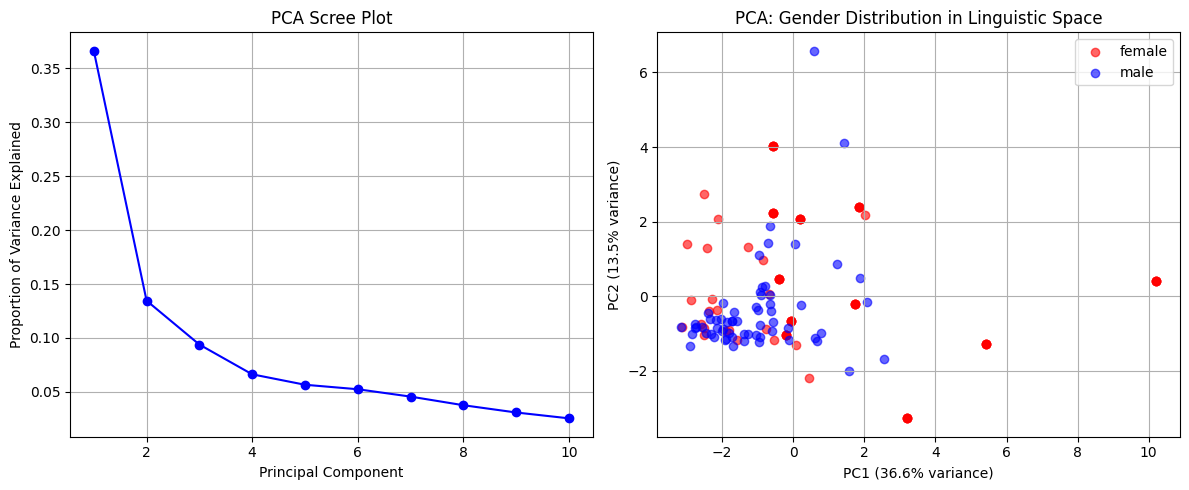


=== PCA FEATURE LOADINGS (First 4 Components) ===
                    PC1    PC2    PC3    PC4
prompt_length     0.176  0.206  0.251  0.445
ttr              -0.325 -0.002  0.064 -0.152
sentence_count    0.345  0.043 -0.071  0.015
sentence_length   0.009 -0.062 -0.043  0.522
opinion_score     0.085  0.055  0.452  0.163
sentiment         0.178 -0.175  0.462  0.055
iteration_count   0.192 -0.127 -0.279 -0.165
emo_anger         0.013  0.493  0.079 -0.156
emo_anticipation  0.274 -0.137  0.079 -0.280
emo_disgust       0.009  0.502  0.048 -0.226
emo_fear          0.266  0.282 -0.257  0.011
emo_joy           0.265 -0.222  0.229 -0.142
emo_negative      0.280  0.258 -0.138  0.062
emo_positive      0.345 -0.096 -0.119  0.057
emo_sadness       0.305  0.173 -0.214  0.078
emo_surprise      0.288 -0.191  0.040 -0.216
emo_trust         0.276 -0.084  0.222 -0.129
pron_first       -0.053  0.096  0.220 -0.401
pron_second       0.004 -0.077 -0.002  0.190
pron_third        0.009  0.309  0.344  0.043

===

In [ ]:
# Select available features
available_features = [f for f in linguistic_features if f in grouped_conversations.columns]
pca_data = grouped_conversations[available_features + ['gender']].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_data[available_features])
# Perform PCA
pca = PCA(n_components=min(len(available_features), 10))
X_pca = pca.fit_transform(X_scaled)

# Create PCA results DataFrame
pca_df = pd.DataFrame(
    X_pca, 
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])],
    index=pca_data.index
)
pca_df['gender'] = pca_data['gender'].values

# Plot PCA results
plt.figure(figsize=(12, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('PCA Scree Plot')
plt.grid(True)

# Biplot of first two components
plt.subplot(1, 2, 2)
colors = {'male': 'blue', 'female': 'red'}
for gender in pca_df['gender'].unique():
    mask = pca_df['gender'] == gender
    plt.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'], 
            c=colors.get(gender, 'gray'), label=gender, alpha=0.6)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA: Gender Distribution in Linguistic Space')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Feature loadings
loadings = pd.DataFrame(
    pca.components_[:4].T,  # First 4 components
    columns=[f'PC{i+1}' for i in range(4)],
    index=available_features
)
print("\n=== PCA FEATURE LOADINGS (First 4 Components) ===")
print(loadings.round(3))

# Test for gender differences in principal components
pc_results = []
for i in range(min(4, X_pca.shape[1])):
    pc_name = f'PC{i+1}'
    pca_df[pc_name] = X_pca[:, i]
    result = enhanced_mann_whitney_test(pc_name, pca_df)
    pc_results.append(result)

pc_results_df = pd.DataFrame(pc_results)
if len(pc_results_df) > 0:
    pc_results_df['p_corrected_bh'] = false_discovery_control(pc_results_df['p_value'].values)
    pc_results_df['effect_interpretation'] = pc_results_df['effect_size_r'].apply(interpret_effect_size)

print("\n=== GENDER DIFFERENCES IN PRINCIPAL COMPONENTS ===")
print(pc_results_df.round(4))

In [79]:
pc_results_df.round(4)

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,effect_interpretation
0,PC1,1352.0,0.0000,0.4497,0.3859,-1.0590,-0.1973,-1.0620,0.8577,63,78,True,0.0000,medium
1,PC2,1777.0,0.0048,0.2768,0.2375,-0.7844,-0.0926,-0.3908,0.3156,63,78,True,0.0064,small
2,PC3,1433.0,0.0000,0.4168,0.3576,-0.4267,0.5589,-0.5044,0.4074,63,78,True,0.0000,medium
3,PC4,2789.0,0.1691,-0.1351,0.1159,0.0781,-0.0384,0.2424,-0.1958,63,78,False,0.1691,small


## 2. Machine Learning Classification


=== MACHINE LEARNING GENDER CLASSIFICATION ===
Random Forest Cross-validation Accuracy: 0.703 ± 0.143

=== TOP 10 MOST IMPORTANT FEATURES FOR GENDER CLASSIFICATION ===
            feature  importance
5         sentiment    0.138636
2    sentence_count    0.103038
3   sentence_length    0.101819
0     prompt_length    0.093421
4     opinion_score    0.074763
19       pron_third    0.073635
17       pron_first    0.066468
1               ttr    0.049862
13     emo_positive    0.045860
16        emo_trust    0.041412


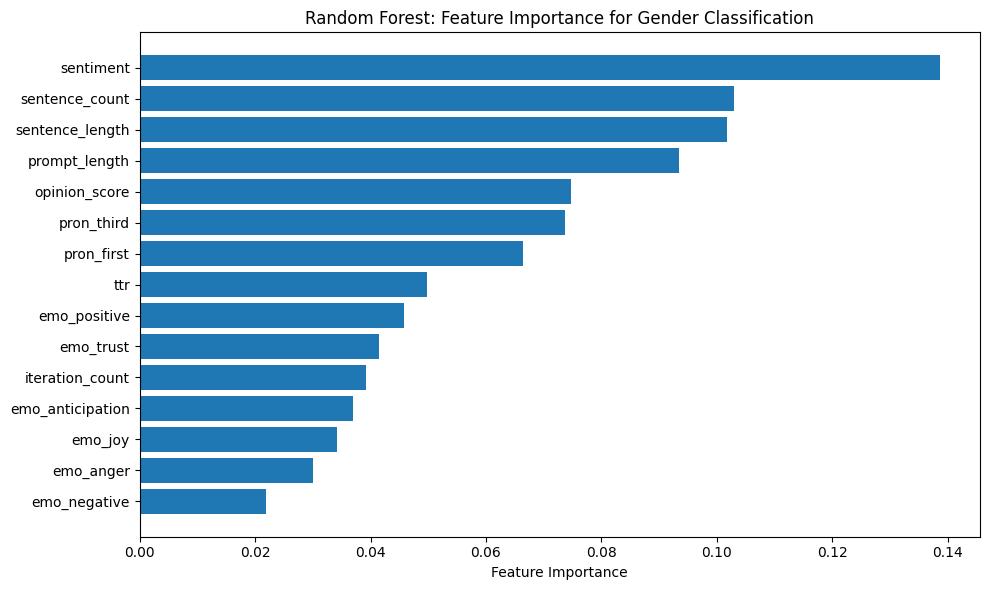

In [80]:
# Prepare data for classification
ml_features = available_features.copy()
ml_data = grouped_conversations[ml_features + ['gender']].dropna()
if len(ml_data) > 20:  # Minimum sample size for meaningful ML
    X = ml_data[ml_features]
    y = ml_data['gender']
    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-validation scores
    cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

    print(f"\n=== MACHINE LEARNING GENDER CLASSIFICATION ===")
    print(f"Random Forest Cross-validation Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

    # Fit model to get feature importance
    rf_classifier.fit(X, y)
    feature_importance = pd.DataFrame({
        'feature': ml_features,
        'importance': rf_classifier.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n=== TOP 10 MOST IMPORTANT FEATURES FOR GENDER CLASSIFICATION ===")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(min(15, len(feature_importance))), 
            feature_importance.head(15)['importance'].values[::-1])
    plt.yticks(range(min(15, len(feature_importance))), 
            feature_importance.head(15)['feature'].values[::-1])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest: Feature Importance for Gender Classification')
    plt.tight_layout()
    plt.show()

## 3. Personality as Moderator Analysis

In [82]:
grouped_conversations.columns

Index(['participant_id', 'gender', 'task_id', 'conversation', 'prompt_length',
       'ttr', 'sentence_length', 'sentence_count', 'phatic_expressions',
       'opinion_score', 'sentiment', 'iteration_count', 'emo_anger',
       'emo_anticipation', 'emo_disgust', 'emo_fear', 'emo_joy',
       'emo_negative', 'emo_positive', 'emo_sadness', 'emo_surprise',
       'emo_trust', 'pron_first', 'pron_second', 'pron_third', 'id_x',
       'created_at', 'extraversion_score', 'agreeableness_score',
       'conscientiousness_score', 'neuroticism_score', 'openness_score',
       'id_y', 'email_norm'],
      dtype='object')


=== PERSONALITY TRAITS BY GENDER ===
                  variable  u_statistic  p_value  rank_biserial_r  \
0       extraversion_score       3664.5   0.0000          -0.6157   
1      agreeableness_score       3329.0   0.0000          -0.4678   
2  conscientiousness_score       3730.0   0.0000          -0.6446   
3        neuroticism_score        446.5   0.0000           0.8031   
4           openness_score       2564.0   0.1116          -0.1305   

   effect_size_r  male_median  female_median  male_mean  female_mean  male_n  \
0         0.5301          2.5            2.0     2.7937       2.3472      63   
1         0.4027          3.5            3.0     3.5635       3.2014      63   
2         0.5550          3.5            3.0     3.6587       3.1111      63   
3         0.6914          2.5            4.0     2.7381       3.9792      63   
4         0.1124          3.0            3.0     2.9365       3.0694      63   

   female_n  significant  p_corrected_bh effect_interpretation  
0

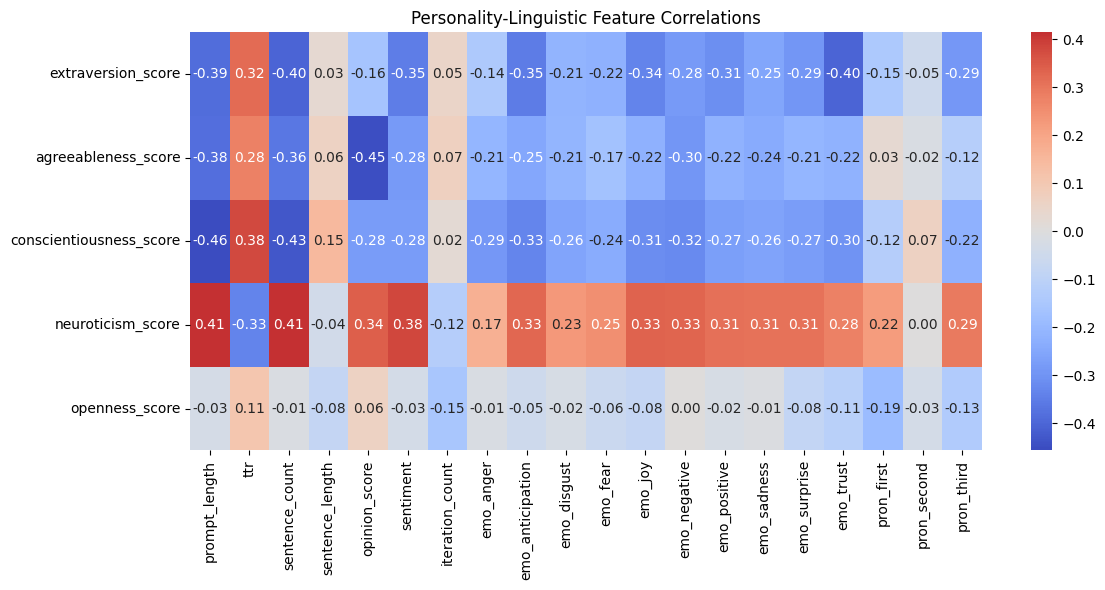


=== STRONGEST PERSONALITY-LINGUISTIC CORRELATIONS ===
          personality_trait linguistic_feature  correlation
28  conscientiousness_score      prompt_length    -0.456281
17      agreeableness_score      opinion_score    -0.447029
30  conscientiousness_score     sentence_count    -0.430017
44        neuroticism_score      prompt_length     0.414375
46        neuroticism_score     sentence_count     0.412567
12       extraversion_score          emo_trust    -0.404380
2        extraversion_score     sentence_count    -0.403303
0        extraversion_score      prompt_length    -0.385053
48        neuroticism_score          sentiment     0.383326
14      agreeableness_score      prompt_length    -0.381488


In [83]:
# Analyze personality traits as potential moderators
personality_traits = ['extraversion_score', 'agreeableness_score', 'conscientiousness_score', 'neuroticism_score', 'openness_score']
available_traits = [trait for trait in personality_traits if trait in grouped_conversations.columns]
if available_traits:
    print("\n=== PERSONALITY TRAITS BY GENDER ===")
    personality_results = []
    for trait in available_traits:
        result = enhanced_mann_whitney_test(trait, grouped_conversations)
        personality_results.append(result)

    personality_df = pd.DataFrame(personality_results)
    if len(personality_df) > 0:
        personality_df['p_corrected_bh'] = false_discovery_control(personality_df['p_value'].values)
        personality_df['effect_interpretation'] = personality_df['effect_size_r'].apply(interpret_effect_size)

    print(personality_df.round(4))

    # Correlation analysis between personality and linguistic features
    if len(available_traits) > 0 and len(available_features) > 0:
        # Calculate correlations
        correlation_data = grouped_conversations[available_traits + available_features].dropna()
        
        if len(correlation_data) > 10:
            corr_matrix = correlation_data.corr()
            
            # Extract personality-linguistic correlations
            personality_linguistic_corr = corr_matrix.loc[available_traits, available_features]
            
            # Plot heatmap
            plt.figure(figsize=(12, 6))
            sns.heatmap(personality_linguistic_corr, annot=True, cmap='coolwarm', 
                    center=0, fmt='.2f')
            plt.title('Personality-Linguistic Feature Correlations')
            plt.tight_layout()
            plt.show()
            
            print("\n=== STRONGEST PERSONALITY-LINGUISTIC CORRELATIONS ===")
            # Find strongest correlations
            corr_pairs = []
            for trait in available_traits:
                for feature in available_features:
                    corr_val = personality_linguistic_corr.loc[trait, feature]
                    if not pd.isna(corr_val) and abs(corr_val) > 0.2:
                        corr_pairs.append({
                            'personality_trait': trait,
                            'linguistic_feature': feature,
                            'correlation': corr_val
                        })
            
            if corr_pairs:
                corr_df = pd.DataFrame(corr_pairs).sort_values('correlation', key=abs, ascending=False)
                print(corr_df.head(10))

## 4. Task Category Analysis

In [86]:
# Analyze differences by task category (if task categories are available)
if 'task_id' in grouped_conversations.columns:
    print("\n=== LINGUISTIC VARIATION BY TASK ===")
    # Summary statistics by task
    task_summary = grouped_conversations.groupby('task_id')[available_features[:5]].mean()
    print("Mean linguistic features by task:")
    print(task_summary.round(3))

    # Test if gender effects vary by task (interaction effects)
    # This is a simplified analysis - full factorial ANOVA would be better
    tasks = grouped_conversations['task_id'].unique()

    if len(tasks) > 1:
        task_gender_effects = []
        
        for task in tasks:
            task_data = grouped_conversations[grouped_conversations['task_id'] == task]
            
            if len(task_data[task_data['gender'] == 'male']) > 3 and \
            len(task_data[task_data['gender'] == 'female']) > 3:
                
                # Test a few key features for this task
                key_features = ['prompt_length', 'sentiment', 'iteration_count']
                for feature in key_features:
                    if feature in task_data.columns:
                        result = enhanced_mann_whitney_test(feature, task_data)
                        result['task_id'] = task
                        task_gender_effects.append(result)
        
        if task_gender_effects:
            task_effects_df = pd.DataFrame(task_gender_effects)
            print("\n=== GENDER EFFECTS BY TASK ===")
            print(task_effects_df[['task_id', 'variable', 'p_value', 'effect_size_r']].round(4))


=== LINGUISTIC VARIATION BY TASK ===
Mean linguistic features by task:
         prompt_length    ttr  sentence_count  sentence_length  opinion_score
task_id                                                                      
1               38.609  0.613          10.391           12.557          0.420
2               55.200  0.668           9.600           14.070          0.379
3               32.357  0.770           6.214           13.900          0.426
4               16.167  0.780           5.750           11.135          0.541
5               33.833  0.792           6.083           14.524          0.299
6               50.182  0.795           5.000           14.135          0.409
9               42.000  0.804           5.091            9.485          0.383
10              33.273  0.804           5.909            9.858          0.522
11              44.636  0.798           4.364           11.752          0.418
12              45.909  0.791           5.000           12.353        

## 5. Comprehensive Results Summary

In [87]:
def create_results_summary():
    """
    Create a comprehensive summary of all results
    """
    print("\n" + "="*60)
    print("COMPREHENSIVE RESULTS SUMMARY")
    print("="*60)
    # Combine all hypothesis results
    all_results = []

    if len(results_df_a) > 0:
        results_df_a['hypothesis'] = 'A: Lexical/Interpersonal'
        all_results.append(results_df_a)

    if len(results_df_b) > 0:
        results_df_b['hypothesis'] = 'B: Sentence Structure'
        all_results.append(results_df_b)

    if len(results_df_d) > 0:
        results_df_d['hypothesis'] = 'D: Iterative Behavior'
        all_results.append(results_df_d)

    if all_results:
        combined_results = pd.concat(all_results, ignore_index=True)
        
        # Summary of significant findings
        significant_bh = combined_results[combined_results['significant_bh'] == True]
        significant_bonf = combined_results[combined_results['significant_bonf'] == True]
        
        print(f"\nSIGNIFICANT FINDINGS (Benjamini-Hochberg FDR correction):")
        print(f"Total tests conducted: {len(combined_results)}")
        print(f"Significant results: {len(significant_bh)}")
        
        if len(significant_bh) > 0:
            print("\nSignificant variables:")
            for _, row in significant_bh.iterrows():
                direction = "Male > Female" if row['male_mean'] > row['female_mean'] else "Female > Male"
                print(f"  {row['variable']}: p_corr = {row['p_corrected_bh']:.4f}, "
                    f"effect = {row['effect_interpretation']}, {direction}")
        
        print(f"\nSIGNIFICANT FINDINGS (Bonferroni correction - more conservative):")
        print(f"Significant results: {len(significant_bonf)}")
        
        if len(significant_bonf) > 0:
            for _, row in significant_bonf.iterrows():
                direction = "Male > Female" if row['male_mean'] > row['female_mean'] else "Female > Male"
                print(f"  {row['variable']}: p_corr = {row['p_corrected_bonf']:.4f}, "
                    f"effect = {row['effect_interpretation']}, {direction}")
        
        # Effect size distribution
        print(f"\nEFFECT SIZE DISTRIBUTION:")
        effect_counts = combined_results['effect_interpretation'].value_counts()
        for effect, count in effect_counts.items():
            print(f"  {effect.title()}: {count} ({count/len(combined_results)*100:.1f}%)")
        
        return combined_results
    else:
        print("No results available for summary.")
        return pd.DataFrame()

In [88]:
final_results = create_results_summary()
final_results


COMPREHENSIVE RESULTS SUMMARY

SIGNIFICANT FINDINGS (Benjamini-Hochberg FDR correction):
Total tests conducted: 20
Significant results: 19

Significant variables:
  ttr: p_corr = 0.0080, effect = small, Male > Female
  emo_anger: p_corr = 0.0015, effect = small, Female > Male
  emo_anticipation: p_corr = 0.0004, effect = medium, Female > Male
  emo_disgust: p_corr = 0.0208, effect = small, Female > Male
  emo_fear: p_corr = 0.0031, effect = small, Female > Male
  emo_joy: p_corr = 0.0007, effect = medium, Female > Male
  emo_negative: p_corr = 0.0015, effect = small, Female > Male
  emo_positive: p_corr = 0.0031, effect = small, Female > Male
  emo_sadness: p_corr = 0.0113, effect = small, Female > Male
  emo_surprise: p_corr = 0.0076, effect = small, Female > Male
  emo_trust: p_corr = 0.0277, effect = small, Female > Male
  pron_first: p_corr = 0.0244, effect = small, Female > Male
  pron_third: p_corr = 0.0007, effect = medium, Female > Male
  phatic_expressions: p_corr = 0.0344, e

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf,hypothesis
0,ttr,3131.5,5.158285e-03,-0.274522,0.235560,0.807018,0.740203,0.794824,0.714263,63,78,True,7.971895e-03,8.769084e-02,small,True,False,A: Lexical/Interpersonal
1,emo_anger,1793.0,4.404940e-04,0.270248,0.231893,0.000000,0.000000,0.190476,0.410256,63,78,True,1.497680e-03,7.488398e-03,small,True,True,A: Lexical/Interpersonal
2,emo_anticipation,1500.0,4.739151e-05,0.389499,0.334219,1.000000,2.000000,1.285714,3.576923,63,78,True,4.028278e-04,8.056557e-04,medium,True,True,A: Lexical/Interpersonal
3,emo_disgust,2026.5,1.590822e-02,0.175214,0.150346,0.000000,0.000000,0.174603,0.448718,63,78,True,2.080306e-02,2.704397e-01,small,True,False,A: Lexical/Interpersonal
4,emo_fear,1822.0,1.618974e-03,0.258445,0.221765,0.000000,0.000000,0.301587,0.910256,63,78,True,3.058062e-03,2.752256e-02,small,True,True,A: Lexical/Interpersonal
5,emo_joy,1569.5,1.599366e-04,0.361213,0.309947,1.000000,2.000000,1.206349,3.474359,63,78,True,6.797307e-04,2.718923e-03,medium,True,True,A: Lexical/Interpersonal
6,emo_negative,1686.5,5.466959e-04,0.313594,0.269087,0.000000,1.000000,0.571429,1.384615,63,78,True,1.548972e-03,9.293831e-03,small,True,True,A: Lexical/Interpersonal
7,emo_positive,1701.0,1.594293e-03,0.307692,0.264023,2.000000,4.000000,2.793651,7.897436,63,78,True,3.058062e-03,2.710298e-02,small,True,True,A: Lexical/Interpersonal
8,emo_sadness,1905.0,8.004102e-03,0.224664,0.192778,0.000000,0.000000,0.349206,1.051282,63,78,True,1.133914e-02,1.360697e-01,small,True,False,A: Lexical/Interpersonal
9,emo_surprise,1837.5,4.462741e-03,0.252137,0.216352,0.000000,1.000000,0.539683,1.948718,63,78,True,7.586660e-03,7.586660e-02,small,True,False,A: Lexical/Interpersonal


## 6. Recommendations for Further Analysis

In [89]:
print("\n" + "="*60)
print("RECOMMENDATIONS FOR FURTHER ANALYSIS")
print("="*60)
recommendations = [
"1. Mixed-Effects Models: Account for participant-level clustering",
"2. Topic Modeling: Analyze semantic themes in prompts using LDA or BERT",
"3. Linguistic Complexity: Add measures like syntactic complexity, readability scores",
"4. Temporal Analysis: Examine how linguistic patterns change within conversations",
"5. Cultural Analysis: Investigate nationality/cultural background effects",
"6. Task-Specific Models: Develop separate models for different task categories",
"7. Validation Study: Replicate findings with independent dataset",
"8. Qualitative Analysis: Conduct thematic analysis of representative prompts"
]
for rec in recommendations:
    print(rec)
    print(f"\nDATA COMPLETENESS CHECK:")
    print(f"Total conversations analyzed: {len(grouped_conversations)}")
    print(f"Gender distribution: {grouped_conversations['gender'].value_counts().to_dict()}")
    print(f"Missing personality data: {grouped_conversations[available_traits].isnull().sum().sum()}")
    print(f"Average linguistic features per participant: {len(available_features)}")


RECOMMENDATIONS FOR FURTHER ANALYSIS
1. Mixed-Effects Models: Account for participant-level clustering

DATA COMPLETENESS CHECK:
Total conversations analyzed: 141
Gender distribution: {'female': 78, 'male': 63}
Missing personality data: 30
Average linguistic features per participant: 20
2. Topic Modeling: Analyze semantic themes in prompts using LDA or BERT

DATA COMPLETENESS CHECK:
Total conversations analyzed: 141
Gender distribution: {'female': 78, 'male': 63}
Missing personality data: 30
Average linguistic features per participant: 20
3. Linguistic Complexity: Add measures like syntactic complexity, readability scores

DATA COMPLETENESS CHECK:
Total conversations analyzed: 141
Gender distribution: {'female': 78, 'male': 63}
Missing personality data: 30
Average linguistic features per participant: 20
4. Temporal Analysis: Examine how linguistic patterns change within conversations

DATA COMPLETENESS CHECK:
Total conversations analyzed: 141
Gender distribution: {'female': 78, 'male'

## Export Results

In [90]:
# Save all results to CSV files for reference
if len(final_results) > 0:
    final_results.to_csv('comprehensive_gender_analysis_results.csv', index=False)
    print("\nResults exported to 'comprehensive_gender_analysis_results.csv'")
    
# Create a summary table for the paper
if len(final_results) > 0:
    paper_summary = final_results[[
    'hypothesis', 'variable', 'male_mean', 'female_mean',
    'p_value', 'p_corrected_bh', 'effect_size_r', 'effect_interpretation', 'significant_bh'
    ]].round(4)
    paper_summary.to_csv('paper_results_summary.csv', index=False)
    print("Paper summary exported to 'paper_results_summary.csv'")


Results exported to 'comprehensive_gender_analysis_results.csv'
Paper summary exported to 'paper_results_summary.csv'
